<a href="https://colab.research.google.com/github/Aleksa21052001/Heart-disease-classification/blob/main/Heart_disease_classification_komentarisano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Bolesti kardiovaskularnog sistema su glavni uzrok smrti sirom sveta. Obuhvataju koronarnu bolest srca, cerebrovaskularnu bolest, reumatsku bolest srca i druge probleme sa srcem i krvnim sudovima. Glavni cilj zadatka je prikupiti karakteristike srčanog udara ili faktore koji doprinose njegovom nastanku, i u problemu binarne klasifikacije predvideti da li osoba jeste ili nije kandidat za nastanak srčanog udara.



<img src="cover.jpg"/>

## Biblioteke

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Pomocne funkcije

In [ ]:
def analyze_outliers(dataframe, column, boxplot_color='orange'):
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=dataframe[column], color=boxplot_color, orient='v')
    plt.xlabel(column)
    plt.ylabel('Vrednost')
    plt.title(f'Box plot za {column}')
    plt.grid()
    plt.show()

    outliers = dataframe[column]
    Q1 = outliers.quantile(0.25) #prvi kvartil tj 25%uzoraka ima manju vrednost od nje
    Q3 = outliers.quantile(0.75) #treci kvartil tj 75%uzoraka ima manju vrednost od nje
    IQR = Q3 - Q1 #interkvartilni opseg:

    outlier_top = outliers[outliers > Q3 + 1.5 * IQR]
    outlier_down = outliers[outliers < Q1 - 1.5 * IQR]

    print(f"\nAnaliza autlajera za kolonu {column}:")
    print(f"Broj autlajera: {len(outlier_top) + len(outlier_down)}")
    print(f"Broj gornjih autlajera: {outlier_top.values}")
    print(f"Broj donjih autlajera: {outlier_down.values}")

In [ ]:
def plot_class_histograms(dataframe, columns, class_column, class_values, colors=None):
    if colors is None:
        colors = {value: 'pink' if value == 0 else 'yellow' for value in class_values}

    for column in columns: #crtamo histogram za svako obelezje
        plt.figure(figsize=(10, 6))
                                    #lista tuplova [(0, 'blue'), (1, 'yellow')]
        for class_value, color in colors.items(): #uzimamo u prvoj iteraciji zdrave zatim bolesne
            data_class = dataframe[dataframe[class_column] == class_value][column] #u prvoj iteraciji column je 'Age', Class Column je 'Class', Class Value 0
            alpha_value = 0.5 if class_value == 0 else 0.5
            plt.hist(data_class, density=True, alpha=alpha_value, bins=50, label=f'{class_column} {class_value} ({column})', color=color)
                                 #True -  histogram se normalizuje
        plt.xlabel(f'{column}')
        plt.ylabel('Verovatnoća')
        plt.legend()
        plt.title(f'Histogram raspodele {column} za {class_column} {class_values}')
        plt.show()

## Ucitavanje fajla

In [ ]:
df = pd.read_csv('Heart Attack.csv')
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


## Osnovni podaci o bazi: Baza podataka sadrzi 1319 uzoraka i 9 obelezja pri cemu nema nedostajucih vrednosti.

In [ ]:
print('Broj uzoraka je: ', df.shape[0],'broj obelezja: ', df.shape[1])
print('Kolicina nedostajucih vrednosti:', df.isnull().sum().sum())

Broj uzoraka je:  1319 broj obelezja:  9
Kolicina nedostajucih vrednosti: 0


## Klase: U skupu podataka postoje 2 klase: pozitivna i negativna. Pozitivna klasa ukazuje da je pacijent imao srčani napad, dok negativna klasa ukazuje da nije imao srčani napad.

In [ ]:
number_of_classes = df['class'].nunique() #number unique - koliko ima brojno razlicitih vrednosti
members_of_classes= df['class'].value_counts() #value_caunts - ispisuje koliko ima koje klase i ispisuje ih
percentage = (df['class'].value_counts() / len(df)) * 100


print(f'Broj klasa: {number_of_classes}')
print('Broj pojavljivanja svake vrednosti:')
print(members_of_classes)
print('Procentualni udeli svake vrednosti:')
print(percentage)

Broj klasa: 2
Broj pojavljivanja svake vrednosti:
class
positive    810
negative    509
Name: count, dtype: int64
Procentualni udeli svake vrednosti:
class
positive    61.410159
negative    38.589841
Name: count, dtype: float64


In [ ]:
unique_values = df.apply(lambda x: x.unique())

# Boxplot analiza - Analiza autlajera

In [ ]:
df.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [ ]:
columns = ['impluse', 'pressurehight', 'pressurelow', 'glucose','kcm','troponin']

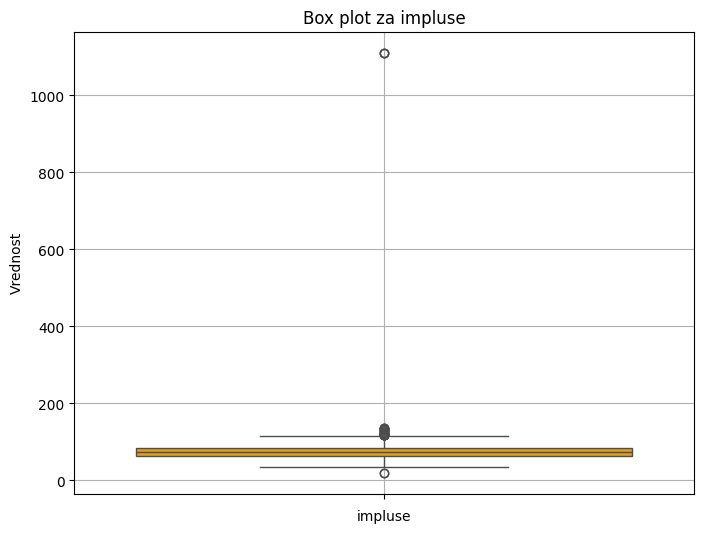


Analiza autlajera za kolonu impluse:
Broj autlajera: 30
Broj gornjih autlajera: [ 135  125 1111  125  120  122  119  117  134  119  132  125  135 1111
  117  132  134  119  117  135 1111  117  125  132  134  119  120  117]
Broj donjih autlajera: [20 20]


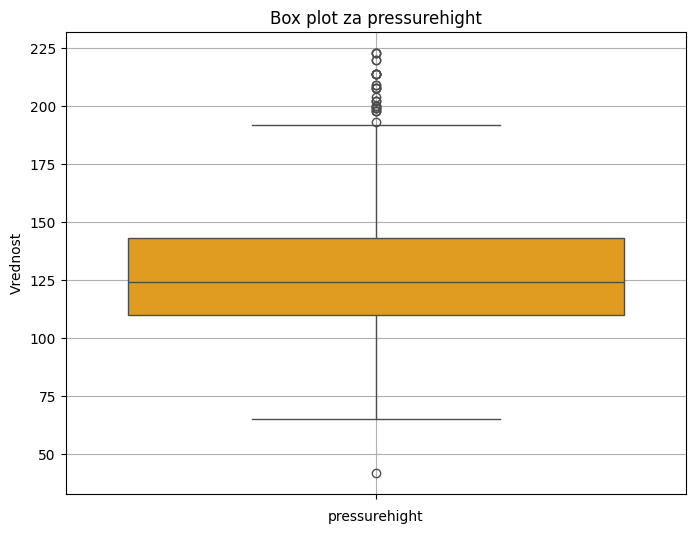


Analiza autlajera za kolonu pressurehight:
Broj autlajera: 32
Broj gornjih autlajera: [214 199 202 193 220 208 198 214 204 200 223 200 214 223 199 202 214 198
 209 208 200 214 223 199 208 202 214 198 209 220 208]
Broj donjih autlajera: [42]


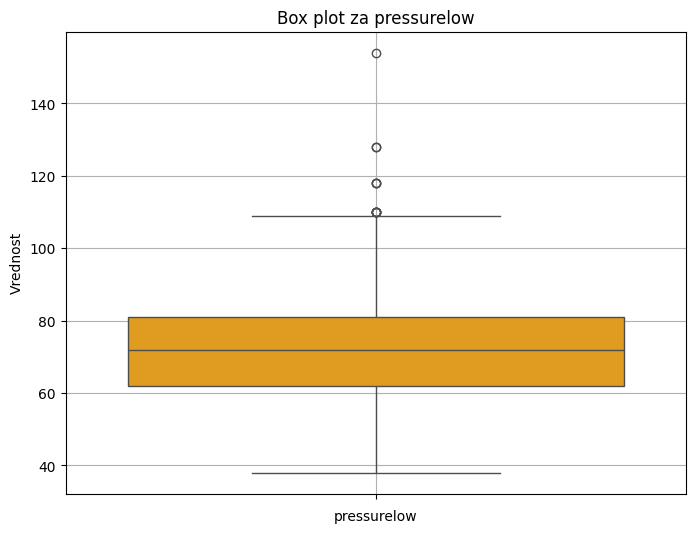


Analiza autlajera za kolonu pressurelow:
Broj autlajera: 12
Broj gornjih autlajera: [110 128 110 118 110 118 110 110 118 154 110 128]
Broj donjih autlajera: []


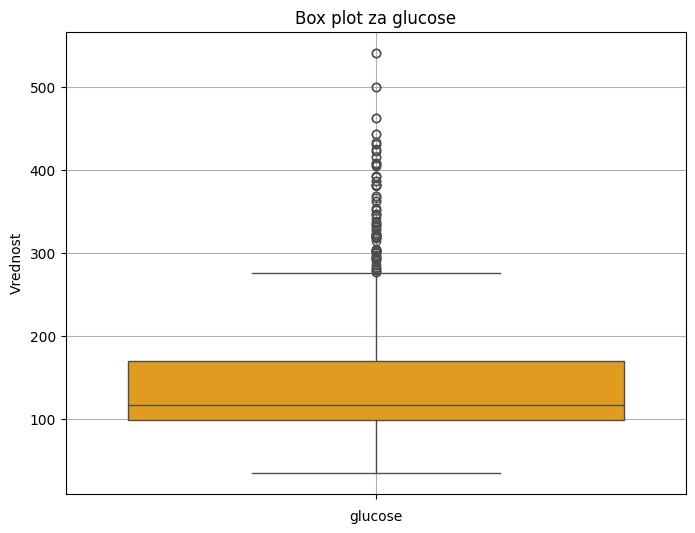


Analiza autlajera za kolonu glucose:
Broj autlajera: 92
Broj gornjih autlajera: [296. 300. 319. 301. 279. 321. 334. 392. 387. 294. 318. 322. 362. 347.
 321. 462. 422. 382. 303. 382. 431. 368. 408. 302. 500. 541. 415. 351.
 443. 407. 319. 290. 381. 404. 425. 366. 342. 336. 324. 346. 347. 283.
 293. 294. 305. 338. 294. 282. 354. 277. 328. 303. 294. 391. 314. 434.
 302. 336. 297. 406. 277. 329. 319. 285. 331. 319. 301. 279. 321. 334.
 392. 387. 294. 318. 322. 362. 347. 321. 462. 422. 382. 303. 382. 431.
 368. 408. 302. 500. 541. 415. 351. 443.]
Broj donjih autlajera: []


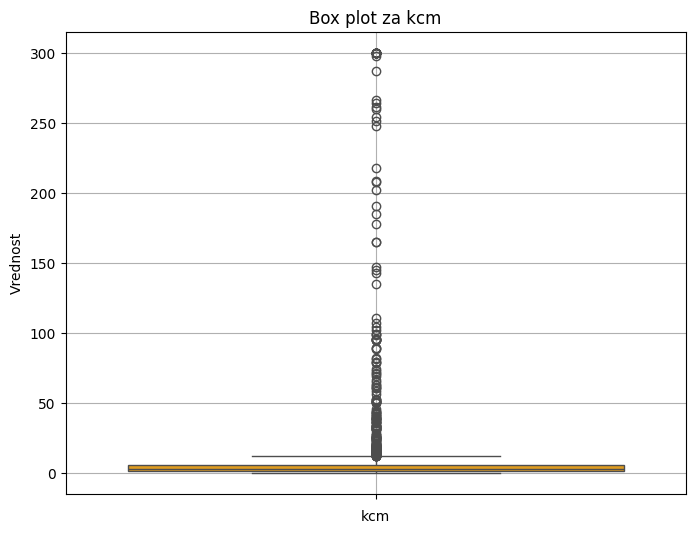


Analiza autlajera za kolonu kcm:
Broj autlajera: 205
Broj gornjih autlajera: [ 13.87 300.    94.79  50.46  38.72 300.    15.23  16.95  19.47  36.24
  18.15  31.97 300.   300.    19.5  165.1  300.    40.99  96.08  51.9
  74.45  49.8   35.55  21.61  14.21 264.4   20.71  39.53  20.21  16.08
 300.   286.9   25.74  16.62  20.46  25.36  98.48  14.07 101.9  134.7
  14.21  16.55  13.97  43.83  15.67  99.56  64.86  31.2   23.97  95.34
 104.3   13.92  18.96  25.97  15.74  12.3   12.41  34.36  21.04  17.61
  96.02 300.    18.41  17.95  38.94  23.11  12.22  17.3  185.1  207.5
 165.   266.3  300.    94.79  50.46  38.72 300.    15.23  16.95  19.47
  36.24  40.99  96.08  51.9   40.6   17.04  14.01 142.6   22.91  70.89
  27.06  12.39  15.83  61.1   13.98  36.53  24.2  259.7   56.39  33.87
  12.2  147.4   23.8   58.29  13.73 300.    33.48  19.01  52.94 297.5
  15.69 254.4   17.32  14.22 217.5   12.26 300.    15.88 300.    37.69
  72.6   32.77  63.13  31.4  177.9   42.15  79.41  43.06 251.4   89.61
  1

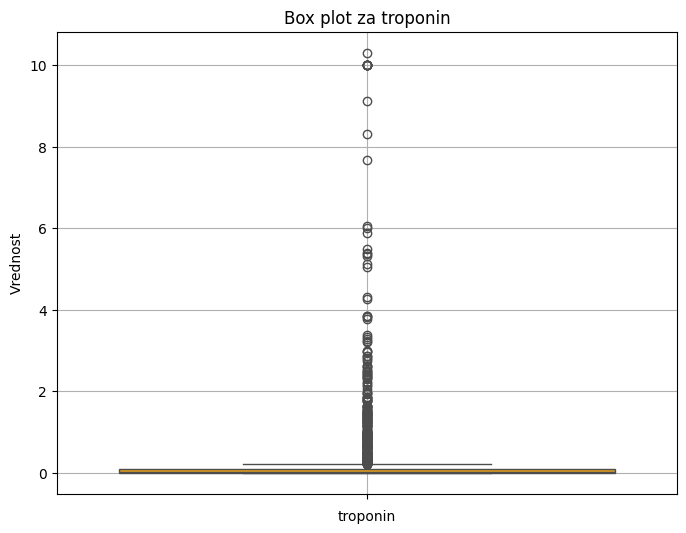


Analiza autlajera za kolonu troponin:
Broj autlajera: 257
Broj gornjih autlajera: [ 1.06   2.37   5.37   0.776  0.491  0.612  1.39  10.     8.3    1.15
  1.01   0.703  0.219  0.864  0.888  1.07   6.05   2.23   1.55   1.84
  0.64   7.67   0.252  1.79   1.95   0.392  0.327  1.24   1.15   1.97
  0.681  1.46   1.23   2.86   1.86   2.99   0.28   3.39   1.33   0.426
  0.353  0.816  0.598  0.77   0.292  0.324  1.18   0.245  5.05   0.267
  0.518  0.425  0.431  2.73   0.331  0.401  0.288  2.96   0.262  2.42
  0.412  0.693  0.372  0.385  1.25   0.554  1.83   1.35   0.929  1.96
  2.63   0.492  1.55   0.988  3.28   1.62   5.31   3.23   0.271  4.32
  1.21   0.454  1.18   1.63   2.48   5.48   0.452  9.11   1.15   0.98
  2.53   0.628  0.758  2.39   2.34   0.697  0.853  0.992  0.457  0.627
  0.245  1.64   0.643  1.76   1.28   0.653  2.47   2.35   0.662  2.87
  2.81   0.866  1.32   1.3    1.36   0.209  3.85   1.64   0.847  0.523
  1.48   1.47   1.5    1.29   0.959  0.218  0.937  3.21   1.31   0.817
  

In [ ]:
for column in columns:
    analyze_outliers(df, column)

## Nevalidne vrednosti-filtriranje

In [ ]:
df = df.loc[
    (df['impluse'] <= 1000) &
    (df['kcm'] <= 125) &
    (df['troponin'] <= 30)
]

In [ ]:
df.shape

(1275, 9)

# Formatiranje ciljnog obelezja

In [ ]:
df['class'] = df['class'].map({'positive': 1, 'negative': 0})

<ipython-input-13-24f3f081288d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'] = df['class'].map({'positive': 1, 'negative': 0})


## Matrica korelacije

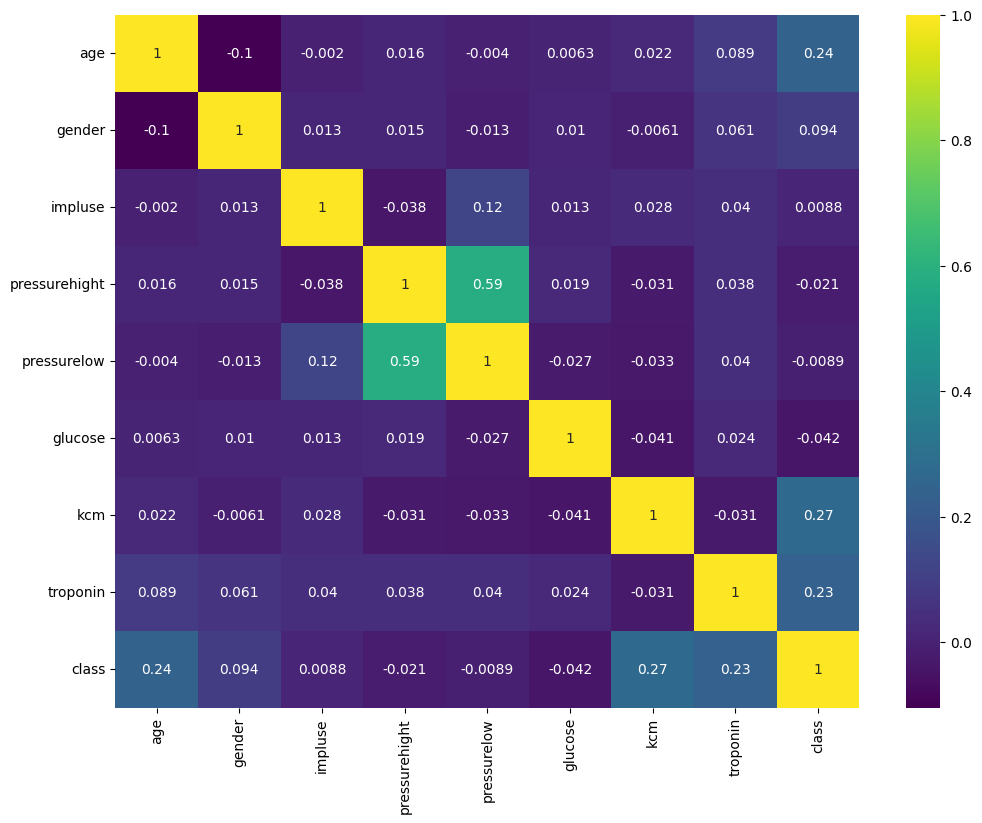

In [ ]:
# nakon sto smo sredili bazu
# koef korelac goovori kako se jedno obelezje menja sa drugim, velika koleracija je preko 0.7 tj nose istu informaaciju
corr = df.corr()
f = plt.figure(figsize=(12, 9))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.show()

## Najdiskriminantnije obelezje

In [ ]:
columns = ['age','impluse','pressurehight','pressurelow','glucose','kcm','troponin']


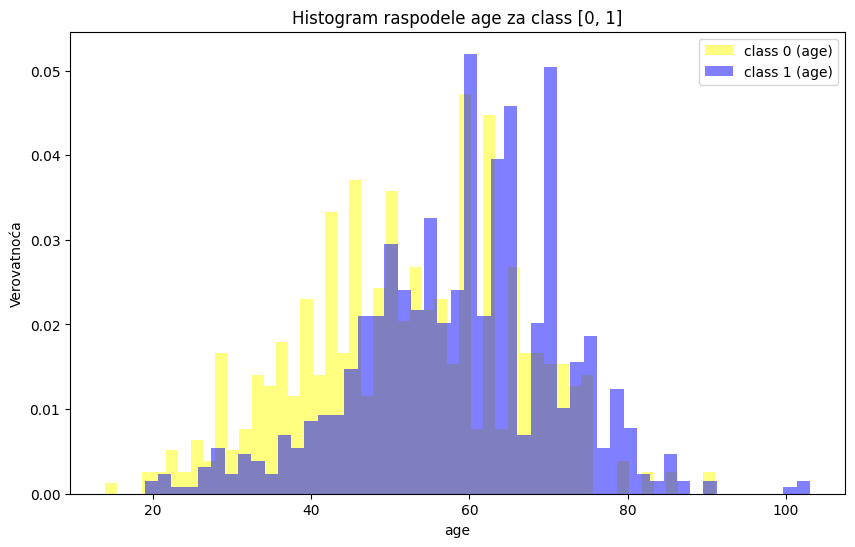

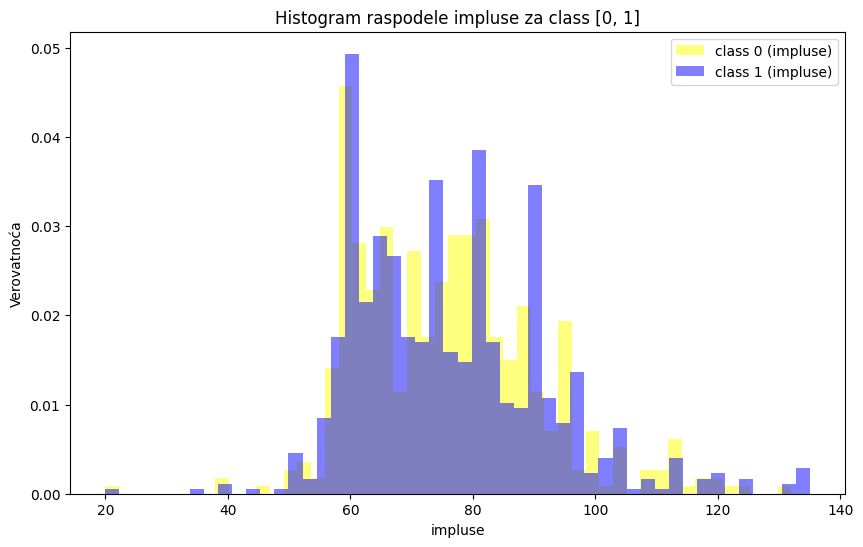

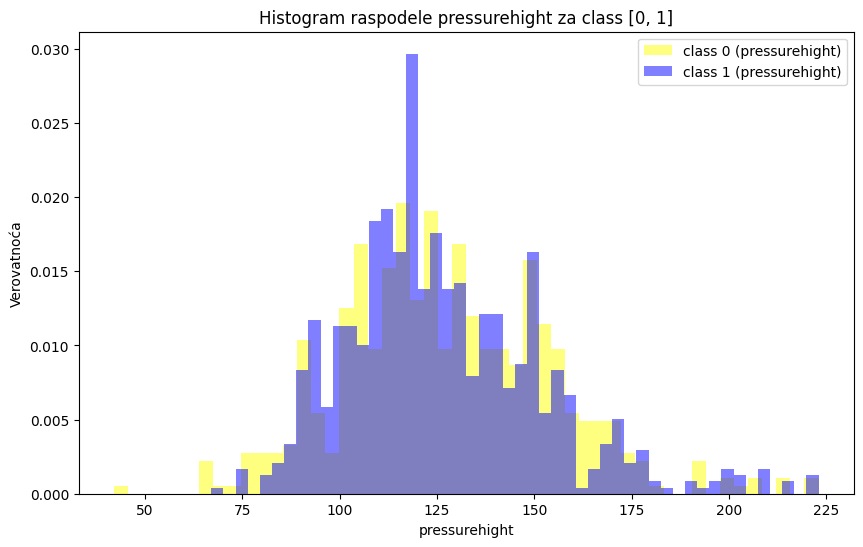

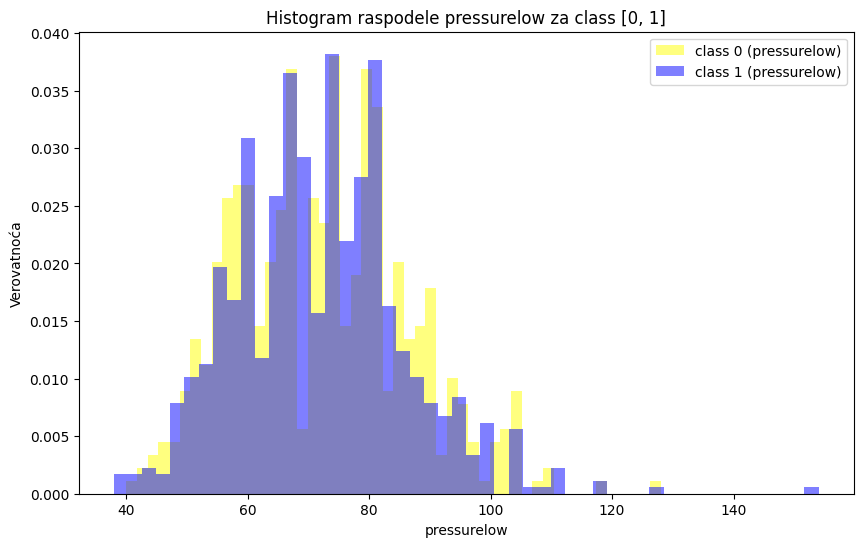

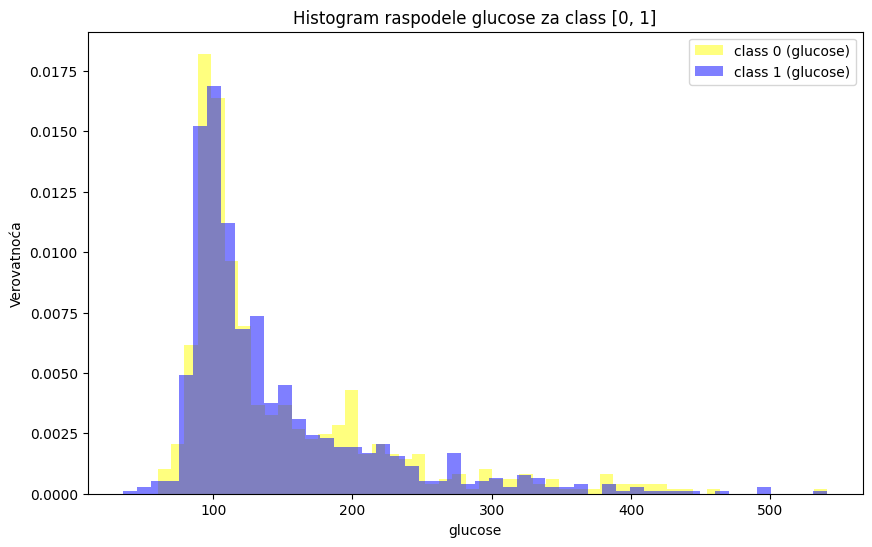

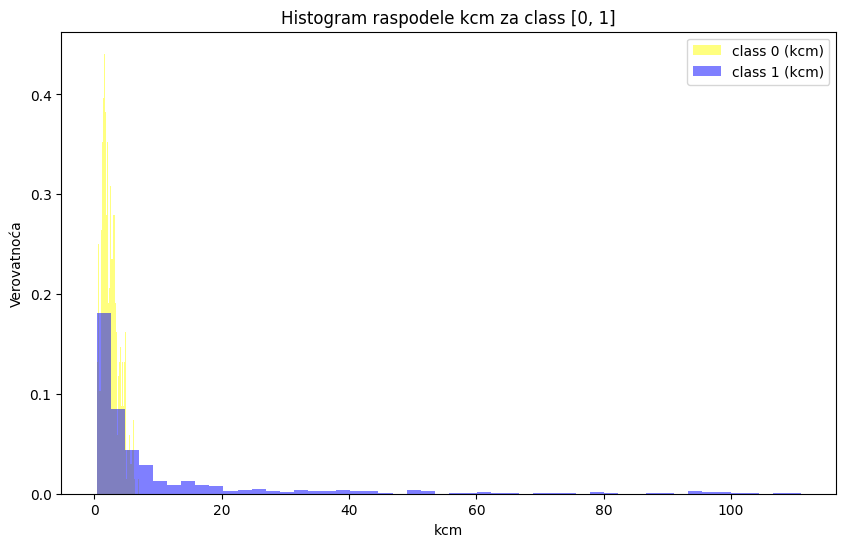

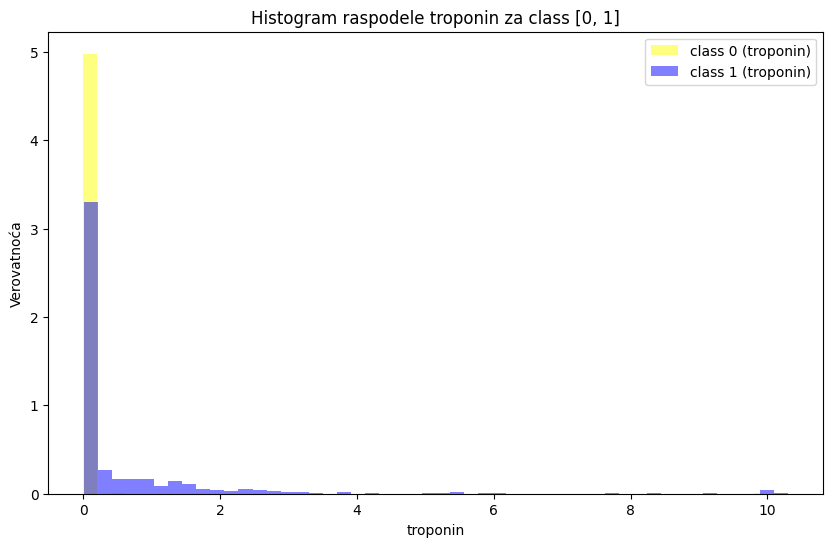

In [ ]:
plot_class_histograms(df, columns, 'class', [0, 1], {0: 'yellow', 1: 'blue'})

# Klasifikacija

In [ ]:
df

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,0
1315,66,1,84,125,55,149.0,1.33,0.172,1
1316,45,1,85,168,104,96.0,1.24,4.250,1
1317,54,1,58,117,68,443.0,5.80,0.359,1


In [ ]:
y=df['class']

In [ ]:
df.drop('class', inplace = True, axis = 1) #Izbacivanje obelezja


In [ ]:
X=df

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
# stratify da imamo istu proporciju klasa bolestan i zdrav u trening i test
# mozemo da imamo i suffle da uzima razbacano uzorke

----------------------------------------------------------------------------------------------------------------------------------------------------------------
# Svm
----------------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
param = {'C':[1,2,3,4,5,6,7,8,9,10], 'kernel':('linear', 'poly', 'rbf')}
# param C regularizacioni parametar iz ciljne funkije;
# kernel: podrazumevana vrednost je rbf, a moˇze se koristiti linear, poly

In [ ]:
dt = SVC()
kf=StratifiedKFold(n_splits=10, shuffle=True, random_state=42) # unakrsna validacija - dajemo svakom podskupu mogucnost da bude u jednom trenutku bitan
clf=GridSearchCV(dt, param,cv=kf)
clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

0.8068627450980392
{'C': 9, 'kernel': 'linear'}


In [ ]:
classifier = SVC(C=9, kernel='linear') # inicijalizacija
classifier.fit(X_train, y_train)  #obuka
y_pred = classifier.predict(X_test)


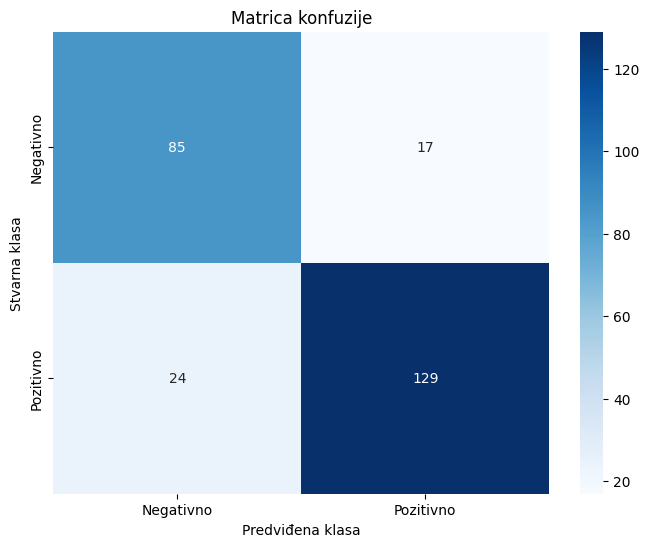

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Vizualizujte matricu konfuzije koristeći seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negativno', 'Pozitivno'], yticklabels=['Negativno', 'Pozitivno'])
plt.xlabel('Predviđena klasa')
plt.ylabel('Stvarna klasa')
plt.title('Matrica konfuzije')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Tačnost: {accuracy}")
print(f"Osetljivost (Recall): {sensitivity}")
print(f"Preciznost: {precision}")


Tačnost: 0.8392156862745098
Osetljivost (Recall): 0.8431372549019608
Preciznost: 0.8835616438356164


# Logisticka regresija

In [ ]:
param = {'max_iter':[10,50,100], 'solver':('newton-cg', 'liblinear', 'sag' ),'penalty':('l1','l2','none')}

In [ ]:
dt = LogisticRegression()
kf=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
clf=GridSearchCV(dt, param,cv=kf)
clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

In [ ]:
classifier = LogisticRegression(max_iter=100, solver='liblinear', penalty='l1')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Tačnost: {accuracy}")
print(f"Osetljivost (Recall): {sensitivity}")
print(f"Preciznost: {precision}")


Tačnost: 0.8117647058823529
Osetljivost (Recall): 0.8431372549019608
Preciznost: 0.8431372549019608


# MLP

In [ ]:
param= {'alpha':[0.0001,0.0002,0.0003], 'solver':('lbfgs', 'sgd', 'adam'), 'max_iter':[50,100,200]}

In [ ]:
dt = MLPClassifier()
kf=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
clf=GridSearchCV(dt, param,cv=kf)
clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

In [ ]:
classifier = MLPClassifier(alpha=0.003,max_iter=200,solver='lbfgs', random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Tačnost: {accuracy}")
print(f"Osetljivost (Recall): {sensitivity}")
print(f"Preciznost: {precision}")

Tačnost: 0.7372549019607844
Osetljivost (Recall): 0.8104575163398693
Preciznost: 0.7654320987654321


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


----------------------------------------------------------------------------------------------------------------------------------------------------------------
# PCA
----------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
from sklearn.decomposition import PCA

Text(0, 0.5, 'Kumulativni udeo varijanse')

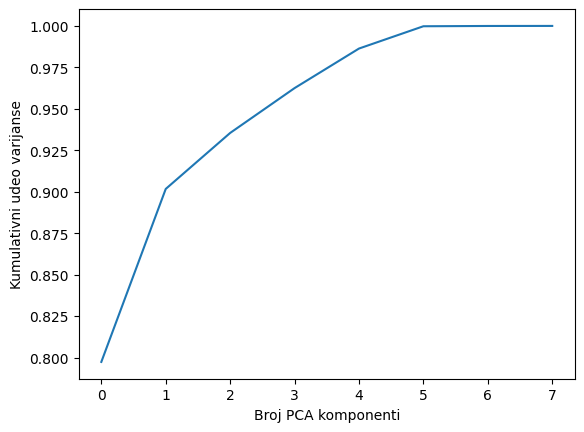

In [ ]:
pca = PCA(n_components=None)
pca.fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_)) # Udeo objasnjene varijanse po komponenti
plt.xlabel("Broj PCA komponenti")
plt.ylabel("Kumulativni udeo varijanse")

In [ ]:
pca = PCA(n_components=0.91) #inicijalizacija, s ciljem da se zadrze komponente koje obuhvataju 91% ukupne varijanse
pca.fit(X_train) #obuka (pronlazenje PCA komponenti)
x_train_r = pca.transform(X_train) #transform - projekcija uzorka na dimenzije novog prostora
x_test_r = pca.transform(X_test)

X_train = x_train_r
X_test = x_test_r

print('Redukovani prostor ima dimenziju: ', pca.n_components_)

Redukovani prostor ima dimenziju:  3



# SVM

In [ ]:
param = {'C':[1,2,3,4,5,6,7,8,9,10], 'kernel':('linear', 'poly', 'rbf')}

In [ ]:
dt = SVC()
kf=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
clf=GridSearchCV(dt, param,cv=kf)
clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

0.6019607843137255
{'C': 2, 'kernel': 'rbf'}


In [ ]:
classifier = SVC(C=0.5, kernel='linear')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negativno', 'Pozitivno'], yticklabels=['Negativno', 'Pozitivno'])
plt.xlabel('Predviđena klasa')
plt.ylabel('Stvarna klasa')
plt.title('Matrica konfuzije')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)

print(f"Tačnost: {accuracy}")
print(f"Osetljivost (Recall): {sensitivity}")
print('preciznost: ', precision_score(y_test, y_pred))


In [ ]:
print("Matrica konfuzije:")
print(cm)

# Logisticka regresija - redukcija

In [ ]:
param = {'max_iter':[10,50,100], 'solver':('newton-cg', 'liblinear', 'sag' ),'penalty':('l1','l2','none')}

In [ ]:
dt = LogisticRegression()
kf=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
clf=GridSearchCV(dt, param,cv=kf)
clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

In [ ]:
classifier = LogisticRegression(max_iter=10, solver='newton-cg', penalty='l2')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negativno', 'Pozitivno'], yticklabels=['Negativno', 'Pozitivno'])
plt.xlabel('Predviđena klasa')
plt.ylabel('Stvarna klasa')
plt.title('Matrica konfuzije')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)

print(f"Tačnost: {accuracy}")
print(f"Osetljivost (Recall): {sensitivity}")
print('preciznost: ', precision_score(y_test, y_pred))
print('f mera: ', f1_score(y_test, y_pred))


# Neuronska mreza - redukcija

In [ ]:
param= {'alpha':[0.0001,0.0002,0.0003], 'solver':('lbfgs', 'sgd', 'adam'), 'max_iter':[50,100,200]}

In [ ]:
dt = MLPClassifier()
kf=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
clf=GridSearchCV(dt, param,cv=kf)
clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

In [ ]:
classifier = MLPClassifier(alpha=0.001,max_iter=50,solver='adam')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negativno', 'Pozitivno'], yticklabels=['Negativno', 'Pozitivno'])
plt.xlabel('Predviđena klasa')
plt.ylabel('Stvarna klasa')
plt.title('Matrica konfuzije')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)

print(f"Tačnost: {accuracy}")
print(f"Osetljivost (Recall): {sensitivity}")
print('preciznost: ', precision_score(y_test, y_pred))
print('f mera: ', f1_score(y_test, y_pred))

----------------------------------------------------------------------------------------------------------------------------------------------------------------
# Neuronska mreza - standardizacija

---



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42, stratify=y)

In [ ]:
param= {'alpha':[0.0001,0.0002,0.0003], 'solver':('lbfgs', 'sgd', 'adam'), 'max_iter':[50,100,200]} # max iter je broj epoha
# alpha kojom brzinom podesava
# neuronske mreze podesavaju tezine putem propagacije u nazad, znaju tacno koji je cvor pogresio i njega azuriraju

In [ ]:
dt = MLPClassifier()
kf=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
clf=GridSearchCV(dt, param,cv=kf)
clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

In [ ]:
classifier = MLPClassifier(alpha=0.002,max_iter=200,solver='lbfgs', random_state=)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)

print(f"Tačnost: {accuracy}")
print(f"Osetljivost (Recall): {sensitivity}")
print('preciznost: ', precision_score(y_test, y_pred))


**LDA**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Inicijalizacija LDA
lda = LinearDiscriminantAnalysis(n_components=None)  # Podesite n_components na broj klasa - 1 za maksimalni broj komponenti
lda.fit(X_train, y_train)

# Transformacija podataka
x_train_r = lda.transform(X_train)  # Projekcija uzorka na dimenzije novog prostora
x_test_r = lda.transform(X_test)

X_train = x_train_r
X_test = x_test_r


# Definišete parametre za SVC
param = {'C': [0.5, 1, 3], 'kernel': ('linear', 'poly', 'rbf')}

# Inicijalizacija SVC modela
dt = SVC()
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
clf = GridSearchCV(dt, param, cv=kf)
clf.fit(X_train, y_train)

print(clf.best_score_)
print(clf.best_params_)


In [ ]:
# Treniranje SVC modela sa najboljim parametrima
classifier = SVC(C=0.5, kernel='rbf')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)

print(f"Tačnost: {accuracy}")
print(f"Osetljivost (Recall): {sensitivity}")
print('preciznost: ', precision_score(y_test, y_pred))

In [ ]:
# Definišete parametre za Logistic Regression
param = {'max_iter': [10, 50, 100], 'solver': ('newton-cg', 'liblinear', 'sag'), 'penalty': ('l1', 'l2', 'none')}

# Inicijalizacija Logistic Regression modela
dt = LogisticRegression()
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
clf = GridSearchCV(dt, param, cv=kf)
clf.fit(X_train, y_train)

print(clf.best_score_)
print(clf.best_params_)

In [ ]:
# Treniranje Logistic Regression modela sa najboljim parametrima
classifier = LogisticRegression(max_iter=clf.best_params_['max_iter'],
                                solver=clf.best_params_['solver'],
                                penalty=clf.best_params_['penalty'])
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
#tacost osetljivost i preciznst korisitmo kod klasifikacije
accuracy = accuracy_score(y_test, y_pred)  # Izračunava tačnost
sensitivity = recall_score(y_test, y_pred)  # Izračunava osetljivost

print(f"Tačnost: {accuracy}")
print(f"Osetljivost (Recall): {sensitivity}")
print('preciznost: ', precision_score(y_test, y_pred))